# QF600 Asset Pricing - Homework 1
## Background
### Efficient Frontier

Industry_Portfolios.xlsx contains monthly nominal (net) returns (expressed as percentages) for ten industry portfolios, over the ten-year period from Jan 2004 through Dec 2013.

Use these returns to estimate the vector of mean returns and the covariance matrix of returns for the ten industry portfolios:

In [140]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")
df = pd.read_excel('Industry_Portfolios.xlsx', index_col='Date')


>Create a table showing the mean return and standard deviation of return for the ten industry portfolios.

In [170]:
stats_df = pd.DataFrame({'Mean': df.mean(), 'Standard Deviation': df.std()})
print("\nMean and Standard Deviation for each column:")
pd.DataFrame(stats_df.round(3))


Mean and Standard Deviation for each column:


,Mean,Standard Deviation
NoDur,0.903,3.346
Durbl,0.733,8.362
Manuf,1.013,5.310
Enrgy,1.231,6.082
HiTec,0.766,5.381
Telcm,0.881,4.448
Shops,0.916,4.094
Hlth,0.784,3.787
Utils,0.907,3.702
Other,0.489,5.582


>Plot the minimum-variance frontier (without the riskless asset) generated by the ten industry portfolios:
>
>This graph must have expected (monthly) return on the vertical axis vs standard deviation of (monthly) return on the horizontal axis.
>
>This graph must cover the range from 0% to 2% on the vertical axis, in increments of 0.1% (or less).

\begin{equation}
\alpha = \mathbf{R'V^{-1}e}; \quad \zeta = \mathbf{R'V^{-1}R}; \quad \delta = \mathbf{e'V^{-1}e}
\end{equation}

\begin{equation}
\sigma_p^2 = \frac{1}{\delta} + \frac{\delta}{\zeta\delta-\alpha^2}(R_p-R_mv)^2
\end{equation}

In [ ]:
R = df.mean().values
V = df.cov().values
e = np.ones(len(df.columns)).T

alpha = R.T@np.linalg.inv(V)@e
zeta  = R.T@np.linalg.inv(V)@R
delta = e.T@np.linalg.inv(V)@e
R_mv  = alpha/delta
alpha, zeta, delta, R_mv

In [ ]:
R_p = np.arange(0,2,.001)
sig_p = (1/delta + delta/(zeta*delta-alpha**2)*(R_p-R_mv)**2)**.5

plt.plot(sig_p, R_p, label="R_p vs. sig_p")
plt.xlabel("Volatility (sig_p)")  # X-axis label
plt.xticks(np.arange(2.5, 5, 0.25))
plt.ylabel("Expected Return (R_p)")         # Y-axis label
plt.title("Plot of R_p vs. sig_p")  # Title of the plot
plt.grid(True)
plt.legend()
plt.show()

> Briefly explain the economic significance and relevance of the minimum-variance frontier to an investor.

If the 10 industries was a good analogy for the whole market and all portfolios in the market. Then it represents portfolios with the lowest risk (variance) for each level of expected return in the market. If an investor must invest in a combination of these 10 industries and has a return in mind, the curve can reveal the lowest risk achievable. Otherwise, If a portfolio has volatility less than the minimum variance, it may help to identify existing portfolios are not taking enough risk to increase returns, or may have outsized return (more than R_mv) and are beating the market in a risk weighted manner.

> Now suppose that the (net) risk-free rate is 0.13% per month:
>
> Plot the efficient frontier (with the riskless asset) on the same graph as the minimum-variance frontier generated by the ten industry portfolios.

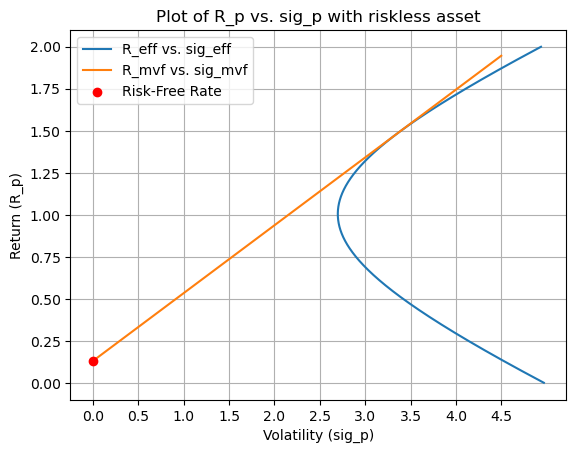

In [152]:
R_f=.13
sig_p_mvf = np.arange(0,4.5,.001)
R_p_mvf = R_f + (zeta-2*alpha*R_f+delta*R_f**2)**.5*sig_p_mvf

plt.plot(sig_p, R_p, label="R_eff vs. sig_eff")
plt.plot(sig_p_mvf, R_p_mvf, label="R_mvf vs. sig_mvf")
plt.xlabel("Volatility (sig_p)")  # X-axis label
plt.xticks(np.arange(0, 5, 0.5))
plt.ylabel("Expected Return (R_p)")         # Y-axis label
plt.title("Plot of R_p vs. sig_p with riskless asset")  # Title of the plot
plt.scatter(0, R_f, color='red', zorder=5, label="Risk-Free Rate")
plt.grid(True)
plt.legend()
plt.show()


>
> Briefly explain the economic significance and relevance of the efficient frontier to an investor.
>
Portfolios left of the curve cannot be achieved without leverage or assets outside the 10 industries. And portfolios on the right and bottom half of the curve do not have a maximised return for volatility of the investment. Portfolios may lie on the right of the efficient frontier, but have more volatility for the same return in investing in the asset. Whereas portfolios on the minimum-variance frontier are efficient because they further diversify an asset porfolio with risk free return to obtain return for significantly less risk.

> The two frontiers will intersect at single point: the tangency portfolio:
>
> Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios.
>
$$ R_{tg} = \frac{\alpha R_f-\zeta}{\delta R_f-\alpha}; \quad \sigma_{tg}=-\frac{(\zeta-2\alpha R_f+\delta R_f^2)^{1/2}}{\delta(R_f-R_{mv})}; \quad Sharpe\hspace{.08cm}Ratio = \frac{R_{tg}-R_f}{\sigma_{tg}}$$

In [166]:
R_tg = (alpha*R_f-zeta)/(delta*R_f-alpha)
sig_tg = -(zeta-2*alpha*R_f+delta*R_f**2)**.5/(delta*(R_f-R_mv))
sharpe_ratio = (R_tg-R_f)/sig_tg
print(f"Sharpe ratio: {sharpe_ratio:.5f}")

Sharpe ratio: 0.40357


$$ \mathbf{w^*} = \left(\frac{\delta R_p-\alpha}{\zeta\delta-\alpha^2}\right) \mathbf{V^{-1}R}+\left(\frac{\zeta-\alpha R_p}{\zeta\delta-\alpha^2}\mathbf{V^{-1}e}\right); \quad R_p = R_{tg}$$

In [178]:
w_star = (delta*R_tg-alpha)/(zeta*delta-alpha**2)*np.linalg.inv(V)@R \
         +(zeta-alpha*R_tg)/(zeta*delta-alpha**2)*np.linalg.inv(V)@e
print(f"tangency portfolio weights")
pd.DataFrame(w_star, df.columns,columns=['Weights'])

tangency portfolio weights


,Weights
NoDur,0.567972
Durbl,-0.214073
Manuf,0.714105
Enrgy,0.104087
HiTec,-0.363438
Telcm,-0.095463
Shops,0.991647
Hlth,0.075570
Utils,0.132643
Other,-0.913051


> Briefly explain the economic significance and relevance of the tangency portfolio to an investor.
>
Tangency portfolio has the highest Sharpe Ratio on the Efficient Frontier. Therefore the result is the highest return for volatility portfolio constrained by any combination of 10 industries with no leverage. 